<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Fourier Transforms</em> </h2>
<h2 align="center"> <a href=\"mailto:jdowell@unm.edu\">Dr. Dowell</a> (UNM) </h2>

# Homework 9
 - Write a function to determine the height and radius of the cylinder that has the minimum surface area for a given volume.

In [1]:
import numpy
from scipy.optimize import minimize, NonlinearConstraint

def volume(radius, height):
    return numpy.pi*radius**2*height

def surface_area(radius, height):
    return 2*numpy.pi*radius**2 + 2*numpy.pi*radius*height

desired_volume = 10
c = NonlinearConstraint(lambda x: volume(x[0], x[1]), lb=desired_volume, ub=desired_volume)
x0 = [1, desired_volume/numpy.pi]
sol = minimize(lambda x: surface_area(x[0], x[1]), x0, constraints=c)
print(sol)

     fun: 25.694955983407567
     jac: array([29.34354019,  7.33592176])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.16754824, 2.33507301])


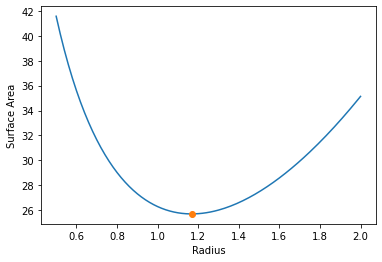

In [2]:
import pylab
r = numpy.linspace(0.5, 2.0, 151)
h = desired_volume/numpy.pi/r**2
pylab.plot(r, surface_area(r, h))
pylab.plot(sol.x[0], surface_area(sol.x[0], sol.x[1]), marker='o')
pylab.xlabel('Radius')
pylab.ylabel('Surface Area')
pylab.show()

# Fourier Transforms

For a given function $f(t)$, the Fourier transform of that function, $\mathcal{F}(f(t)) = F(\omega)$, is given by:
<center>$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt$,</center>
where $\omega$ (angular frequency) is the Fourier conjugate variable of $t$ (time).

 * You can expand the exponential term in the integration into a (complex) sum on cosine and sine terms:
 <center>$e^{-i \omega t}$ = $\cos(-\omega t) + i \sin(-\omega t)$ or:</center>
 <center> = $\cos(\omega t) - i \sin(\omega t)$.</center>
 * This converts the Fourier transform relation into:
 <center>$F(\omega) = \int_{-\infty}^{\infty} f(t) \cos(\omega t) - i f(t) \sin(\omega t) dt$</center>
or:
 <center> = $\int_{-\infty}^{\infty} f(t) \cos(\omega t) dt - i \int_{-\infty}^{\infty} f(t) \sin(\omega t) dt$.</center>

There is also an inverse Fourier transform:
<center>$f(t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} d\omega$.</center>

# Example - Rectangular Window

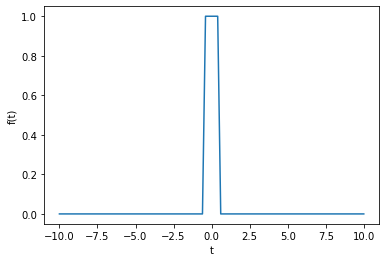

In [3]:
t = numpy.linspace(-10, 10, 101)
tau = 1.0
y = numpy.zeros_like(t)
y[numpy.where(numpy.abs(t) < tau/2)] = 1.0
pylab.plot(t, y)
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.show()

A rectaglular window is a simple peicewise function, it is one inside the window and zero everywhere else.  Using the cosine/sine expansion of the Fourier transform:
<center>$F(rect(t/\tau)) = \int_{-\tau/2}^{\tau/2} cos(\omega t) dt -i \int_{-\tau/2}^{\tau/2} sin(\omega t) dt$</center>
Since sine is an odd function the complex part of the transform vanishes and you are left with:
<center>$F(rect(t/\tau)) = \left[ \frac{\sin(\omega t)}{\omega} \right]_{t=-\tau/2}^{t=\tau/2}$</center>
<center> = $2 \frac{\sin(\omega \tau/2)}{\omega} = \tau \mbox{sinc}\left(\frac{\omega \tau}{2}\right)$.</center>

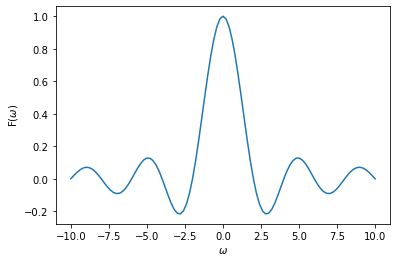

In [4]:
omega = numpy.linspace(-10, 10, 101)
f = tau*numpy.sinc(omega*tau/2)
pylab.plot(omega, f)
pylab.xlabel('$\omega$')
pylab.ylabel('F($\omega$)')
pylab.show()

# Example - Cosine Function

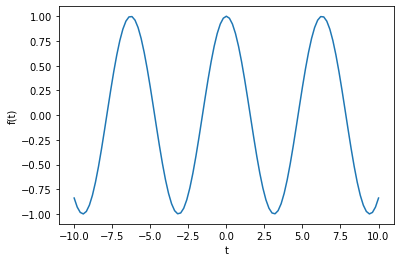

In [5]:
t = numpy.linspace(-10, 10, 101)
omega0 = 1.0
y = numpy.cos(omega0*t)
pylab.plot(t, y)
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.show()

For a cosine function it is easier to convert the $\cos(\omega_0 t)$ into an complex exponential sum of $(e^{i \omega_0 t} + e^{-i \omega_0 t})/2$:
<center>$F(\cos(\omega_0 t)) = 1/2 \int_{-\infty}^{\infty} \left[e^{i \omega_0 t} + e^{-i \omega_0 t}\right] e^{-i \omega t} dt$</center>
<center> = $1/2 \int_{-\infty}^{\infty} e^{-i (\omega - \omega_0) t} dt + 1/2 \int_{-\infty}^{\infty} e^{-i (\omega + \omega_0) t} dt$</center>
<center> = $1/2 \delta(\omega - \omega_0) + 1/2 \delta(\omega + \omega_0)$.</center> 

From this we also see that the Fourier transform of a constant value, i.e., $\omega_0=0$, is a delta function at zero.

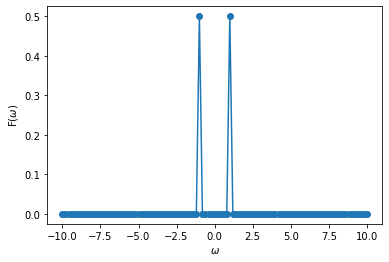

In [6]:
omega = numpy.linspace(-10, 10, 101)
f = numpy.zeros_like(omega)
f[numpy.where((omega-omega0) == 0)] = 0.5
f[numpy.where((omega+omega0) == 0)] = 0.5
pylab.plot(omega, f, linestyle='-', marker='o')
pylab.xlabel('$\omega$')
pylab.ylabel('F($\omega$)')
pylab.show()

# Example - Sine Function

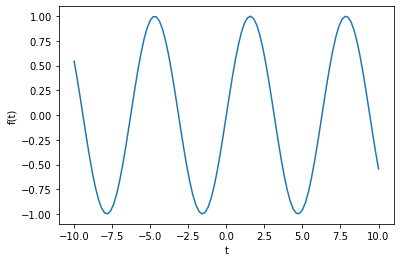

In [7]:
t = numpy.linspace(-10, 10, 101)
omega0 = 1.0
y = numpy.sin(omega0*t)
pylab.plot(t, y)
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.show()

Similar to cosine, it is easier to convert the $\sin(\omega_0 t)$ into an complex exponential sum of $-i (e^{i \omega_0 t} - e^{-i \omega_0 t})/2$.  This flip of the sign causes the result to be imaginary and:
<center>$F(\sin(\omega_0 t)) = -i/2 \delta(\omega - \omega_0) + i/2 \delta(\omega + \omega_0)$.</center> 

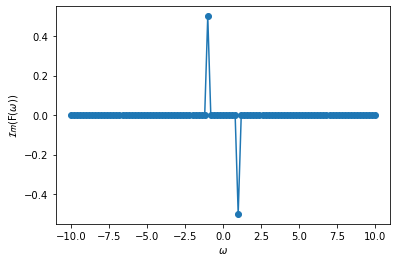

In [8]:
omega = numpy.linspace(-10, 10, 101)
f = numpy.zeros_like(omega)
f[numpy.where((omega-omega0) == 0)] = -0.5
f[numpy.where((omega+omega0) == 0)] = 0.5
pylab.plot(omega, f, linestyle='-', marker='o')
pylab.xlabel('$\omega$')
pylab.ylabel('$\mathcal{Im}$(F($\omega$))')
pylab.show()

# Example - Gaussian

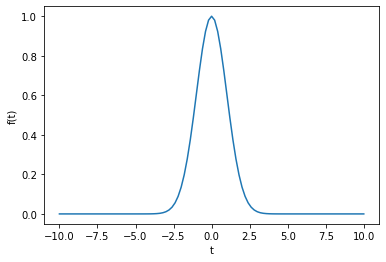

In [9]:
t = numpy.linspace(-10, 10, 101)
a = 1.0
y = numpy.exp(-t**2/2/a**2)
pylab.plot(t, y)
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.show()

For a Gaussian function, the Fourier transform is another Gaussian function.  For:
<center>$f(t) = e^{\frac{-t^2}{2 a^2}}$,</center>
the Fourier transform is:
<center>$F(\omega) = \sqrt{2 \pi} a e^{-2 \pi^2 a^2 \omega^2}$.</center>

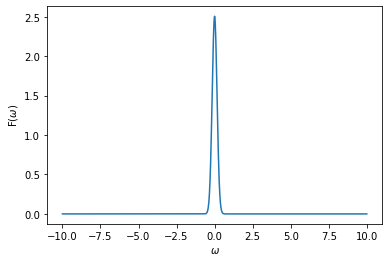

In [10]:
omega = numpy.linspace(-10, 10, 1001)
f = numpy.sqrt(2*numpy.pi)*a*numpy.exp(-2*numpy.pi**2*a**2*omega**2)
pylab.plot(omega, f)
pylab.xlabel('$\omega$')
pylab.ylabel('F($\omega$)')
pylab.show()

# Properties

From the defintion of the Fourier transform and the examples above we notice a few things:
 * $\mathcal{F}(a f(t)) = a \mathcal{F}(f(t))$, 
 * $\mathcal{F}(a f(t) + b g(t)) = a \mathcal{F}(f(t)) + b \mathcal{F}(g(t))$,
 * $\mathcal{F}($real odd function$)$ is an imaginiary odd function, $\mathcal{F}($real even function$)$ is a real even function, and
 * A shift in one Fourier conjugate variable is a complex rotation in the other.

We also notice a scaling relation between $f(t)$ and $F(\omega)$, that functions that are "large" in one of the Fourier conjugate variables are "small" in the other conjucate variable.  More specifically:
<center>$\mathcal{F}(f(a t)) = \frac{1}{|a|} F(\omega/a)$.</center>
This particular property can be useful for modeling/removing a signal.  For example, if your signal is hard to capture in the time domain it may be easier to understand in the frequency domain.
 
 
 
 

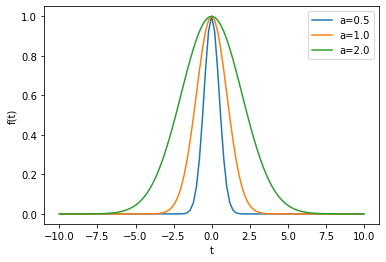

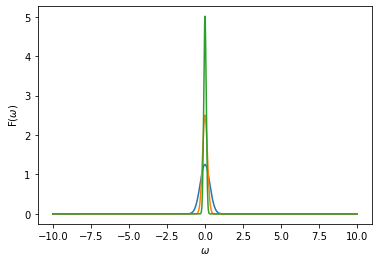

In [11]:
t = numpy.linspace(-10, 10, 101)
for a in (0.5, 1.0, 2.0):
    y = numpy.exp(-t**2/2/a**2)
    pylab.plot(t, y, label=f"a={a:.1f}")
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.legend()
pylab.draw()

pylab.figure()

omega = numpy.linspace(-10, 10, 1001)
for a in (0.5, 1.0, 2.0):
    f = numpy.sqrt(2*numpy.pi)*a*numpy.exp(-2*numpy.pi**2*a**2*omega**2)
    pylab.plot(omega, f, label=f"a={a:.1f}")
pylab.xlabel('$\omega$')
pylab.ylabel('F($\omega$)')
pylab.show()

# Properties
Another important property of Fourier transforms is the convolution theorem:
<center>$f(t) * g(t) = \int_{-\infty}^{\infty} f(\tau) g(t-\tau) d\tau = \mathcal{F}^{-1}[F(\omega) G(\omega)]$,</center>
where $*$ is the convolution operator.

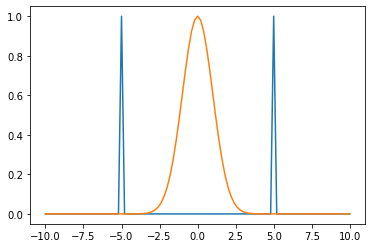

In [12]:
t = numpy.linspace(-10, 10, 101)
f = numpy.zeros_like(t)
f[numpy.where(numpy.abs(t) == 5)] = 1.0
g = numpy.exp(-t**2/2/1.0**2)
pylab.plot(t, f)
pylab.plot(t, g)
pylab.show()

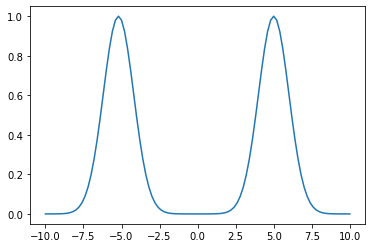

In [13]:
c = numpy.zeros_like(t)
for i in range(t.size):
    for j in range(t.size):
        c[i] += f[j]*g[i-j]
pylab.plot(t, c)
pylab.show()


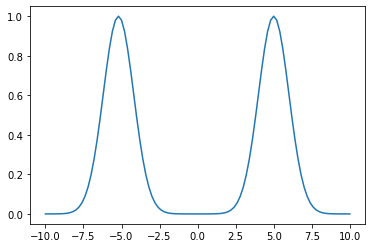

In [14]:
c2 = numpy.fft.ifft(numpy.fft.fft(f)*numpy.fft.fft(g[::-1])).real
pylab.plot(t, c2)
pylab.show()


# Properties

Similar to convolution, correlation, $\star$ can be written as:
<center>$f(t) \star g(t) = \int_{-\infty}^{\infty} f(\tau) g(\tau-t) d\tau = \mathcal{F}^{-1}[F(\omega) G^{*}(\omega)]$.</center>

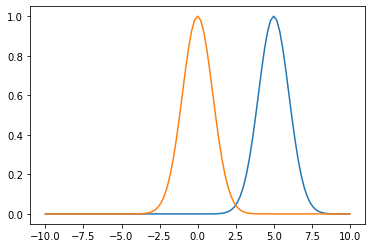

In [15]:
t = numpy.linspace(-10, 10, 101)
f = numpy.exp(-(t-5)**2/2/1.0**2)
g = numpy.exp(-t**2/2/1.0**2)
pylab.plot(t, f)
pylab.plot(t, g)
pylab.show()

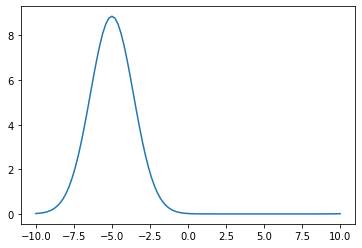

In [16]:
c = numpy.zeros_like(t)
for i in range(t.size):
    for j in range(t.size):
        c[i] += f[j]*g[j-i]
pylab.plot(t, c)
pylab.show()

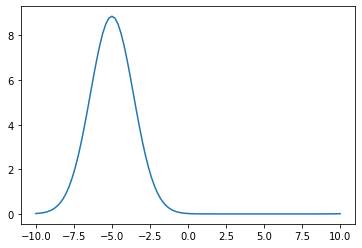

In [17]:
c2 = numpy.fft.ifft(numpy.fft.fft(f)*numpy.fft.fft(g).conj()).real
pylab.plot(t, c2)
pylab.show()

# From Continuous to Discrete

Unless you are working analytically or using a computer with *a lot* of memory you are probably going to be using discrete Fourier transforms.  There are many practicle considerations associated with this switch that I will talk about, most notably sampling and aliasing, that are a result of limited sampling of the function or signal.

# Nyquist-Shannon Sampling Theory

Consider a signal where you know the maximum frequency present is $\omega$.  Nyquist-Shannon says that to properly sample this signal, i.e., be able to fully reconstruct it, you need to sample it at a frequency of 2$\omega$.  This rate if 2$\omega$ is known as the Nyquist rate.  If you sample less at less than 2$\omega$ you have ambiguity in the reconstruction because you cannot tell a difference from a component of the signal at a frequency of $\omega - \Delta \omega$ and a frequency of $\omega + \Delta \omega$.  The higher frequency signals are said to be *undersampled*.

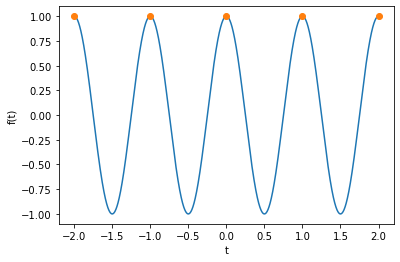

In [18]:
t = numpy.linspace(-2, 2, 4001)
t_low = numpy.linspace(-2, 2, 5)
f = numpy.cos(2*numpy.pi*1*t)
f_low = numpy.cos(2*numpy.pi*1*t_low)
pylab.plot(t, f)
pylab.plot(t_low, f_low, linestyle='', marker='o')
pylab.xlabel('t')
pylab.ylabel('f(t)')
pylab.show()

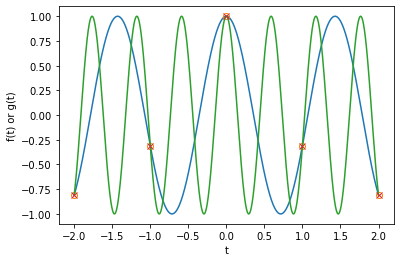

In [19]:
t = numpy.linspace(-2, 2, 4001)
t_low = numpy.linspace(-2, 2, 5)
f = numpy.cos(2*numpy.pi*0.7*t)
f_low = numpy.cos(2*numpy.pi*0.7*t_low)
g = numpy.cos(2*numpy.pi*1.7*t)
g_low = numpy.cos(2*numpy.pi*1.7*t_low)
pylab.plot(t, f)
pylab.plot(t_low, f_low, linestyle='', marker='o', markerfacecolor='none')
pylab.plot(t, g)
pylab.plot(t_low, g_low, linestyle='', marker='x')
pylab.xlabel('t')
pylab.ylabel('f(t) or g(t)')
pylab.show()

Aliasing is not all bad, though.  For a sample frequency of $\omega_s$ you can correctly represent a signal with frequencies $[\omega_s/2, \omega_s)$ as long as you can ensure that there are no frequenies $[0, \omega_s/2)$.

# The Discrete (Time) Fourier Transform

The discrete version of the Fourier transform is:
<center>$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt \rightarrow \sum_{n=-\infty}^{\infty} f_n e^{-i \omega n}$, </center>
where $f_n$ is the value of $f$ samples at time $t_n$.

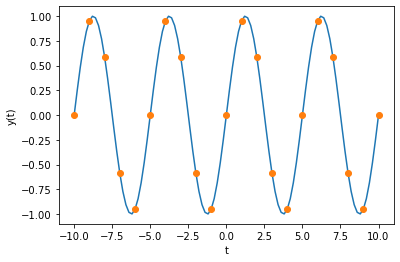

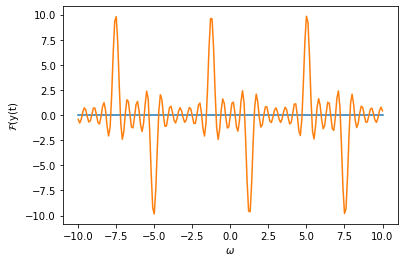

In [20]:
t = numpy.linspace(-10, 10, 101)
t_low = numpy.linspace(-10, 10, 21)
y = numpy.sin(2*numpy.pi*0.2*t)
y_low = numpy.sin(2*numpy.pi*0.2*t_low)
pylab.plot(t, y)
pylab.plot(t_low, y_low, linestyle='', marker='o')
pylab.xlabel('t')
pylab.ylabel('y(t)')
pylab.draw()


omega = numpy.linspace(-10, 10, 201)
f = numpy.zeros(omega.shape, dtype=numpy.complex128)
for i in range(omega.size):
    for n in range(t_low.size):
        f[i] += y_low[n]*numpy.exp(-1j*omega[i]*(n-t_low.size//2))
pylab.figure()
pylab.plot(omega, f.real)
pylab.plot(omega, f.imag)
pylab.xlabel('$\omega$')
pylab.ylabel('$\mathcal{F}$(y(t)')
pylab.show()
        
    

This is slightly different to what we found in the analytic case above which was a collection of pure delta functions.  This is an effect of this example being truncated in time, i.e., we have effectively convolved our sine wave with a rectangular window and we are seeing the sinc function convoled with the delta functions in the DFT.

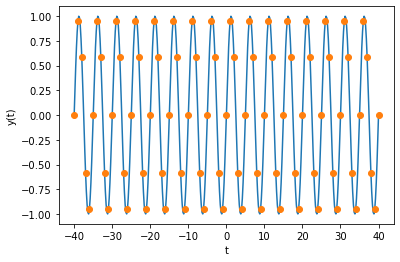

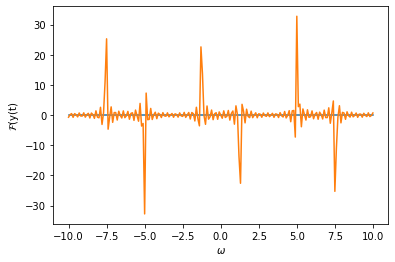

In [21]:
t = numpy.linspace(-40, 40, 401)
t_low = numpy.linspace(-40, 40, 81)
y = numpy.sin(2*numpy.pi*0.2*t)
y_low = numpy.sin(2*numpy.pi*0.2*t_low)
pylab.plot(t, y)
pylab.plot(t_low, y_low, linestyle='', marker='o')
pylab.xlabel('t')
pylab.ylabel('y(t)')
pylab.draw()


omega = numpy.linspace(-10, 10, 201)
f = numpy.zeros(omega.shape, dtype=numpy.complex128)
for i in range(omega.size):
    for n in range(t_low.size):
        f[i] += y_low[n]*numpy.exp(-1j*omega[i]*(n-t_low.size//2))
pylab.figure()
pylab.plot(omega, f.real)
pylab.plot(omega, f.imag)
pylab.xlabel('$\omega$')
pylab.ylabel('$\mathcal{F}$(y(t)')
pylab.show()

The alternative to the DTFT is the DFT which operates on only $N$ time samples:
<center>$F(\omega_k) = \sum_{n=0}^{N-1} f_n e^{-2 \pi i k n / N}$, </center>
where $\omega_k$ is $2 \pi k / N$.

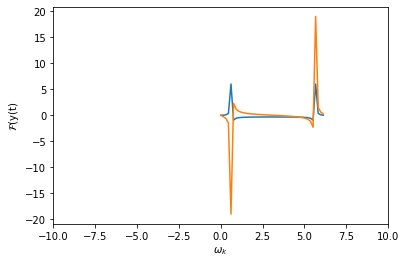

In [22]:
t_low = numpy.linspace(-10, 10, 41)
y_low = numpy.sin(2*numpy.pi*0.2*t_low)

omega = numpy.arange(t_low.size) * 2*numpy.pi / t_low.size
f = numpy.zeros(omega.shape, dtype=numpy.complex128)
for k in range(omega.size):
    for n in range(t_low.size-1):
        f[k] += y_low[n]*numpy.exp(-2j*numpy.pi*k*n/t_low.size)
pylab.plot(omega, f.real)
pylab.plot(omega, f.imag)
pylab.xlabel('$\omega_k$')
pylab.ylabel('$\mathcal{F}$(y(t)')
pylab.xlim(-10, 10)
pylab.show()

The DFT has the similar properties to a continuos Fourier transform but it also dipslayes a periodicity of $N$ samples because of its finite length.  This feature can cause problems for convolutions and correlations since the boundaries can "wrap" and introduce artifacts.

The main drawback of the DFT, however, is that its complexity scales as $\mathcal{O}(N^2)$.  For the $N$ frequencies there are $N$ sums of $N$ numbers, each of which requires a complex multiplication.  

# The Fast Fourier Transform

The alternative to the DFT is the FFT which is what is most commonly used in packages like `numpy.fft` and `scipy.fftpack`.  The strength of the FFT lies in its scaling as $\mathcal{O}(N \log N)$ rather than $\mathcal{O}(N^2)$.

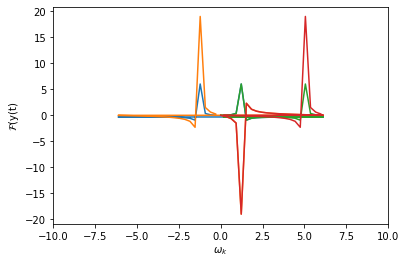

In [23]:
t_low = numpy.linspace(-10, 10, 41)
y_low = numpy.sin(2*numpy.pi*0.2*t_low)

omega = numpy.fft.fftfreq(t_low.size, d=(t_low[1]-t_low[0])) * 2*numpy.pi
f = numpy.fft.fft(y_low)
pylab.plot(omega, f.real)
pylab.plot(omega, f.imag)
omega2 = omega*1.0
omega2[numpy.where(omega2 < 0)] = 2*numpy.pi + omega2[numpy.where(omega2 < 0)]
pylab.plot(omega2, f.real)
pylab.plot(omega2, f.imag)
pylab.xlabel('$\omega_k$')
pylab.ylabel('$\mathcal{F}$(y(t)')
pylab.xlim(-10, 10)
pylab.show()

# Going from $N^2$ to $N \log N$

Start by rewriting the exponential $e^{-2 \pi i / N}$ as $W_{N}$.  With this the DFT becomes:
<center>$F_k = \sum_{n=0}^{N-1} f_n e^{-2 \pi i k n / N} = \sum_{n=0}^{N-1} f_n W_N^{k n}$.</center>
Now, let's think of the N=8 case and see what the values of $W_N^{n}$ are:

 * $W_8^{0} = 1$
 
 * $W_8^{1} = e^{-\pi i / 4}$
 
 * $W_8^{2} = e^{-\pi i / 2}$
 
 * $W_8^{3} = e^{-3 \pi i / 4}$
 
 * $W_8^{4} = e^{-\pi i} = -1 = - W_8^{0}$
 
 * $W_8^{5} = e^{-5 \pi i / 4} = -e^{-\pi i/ 4} = -W_8^{1}$
 
 * $W_8^{6} = e^{-6 \pi i / 4} = -e^{-\pi i / 2} = -W_8^{2}$
 
 * $W_8^{7} = e^{-7 \pi i / 4} = -e^{-\pi i / 2} = -W_8^{3}$
 
 or, more generally, $W_N^{k n} = -W_N^{k (n - N/2)}$.  This $N/2$ periodicity gave Cooley and Tukey an idea back in 1965.


Using the $N/2$ periodicity, they split the DFT by even and odd samples of $f_n$:
<center>$\sum_{n=0}^{N-1} f_n W_N^{k 2n}$</center>
<center>$= \sum_{n=0}^{N/2-1} f_{2n} W_N^{k 2n} + \sum_{n=0}^{N/2-1} f_{2n+1} W_N^{k (2n+1)}$.</center>
They then noticed that $W_N^{k2n} = W_{N/2}^{kn}$ and were able to simplify this to:
<center>$= \sum_{n=0}^{N/2-1} f_{2n} W_{N/2}^{k n} + W_{N}^k\sum_{n=0}^{N/2-1} f_{2n+1} W_{N/2}^{k n}$.</center>
From this you get that an $N$ point DFT can be written as the sum of two $N/2$ point DFTs:
<center>$F_k = G_k + W_{N}^k H_k$.</center>

Coming full circle with this we see that:

 * $F_0 = G_0 + W_{N}^0 H_0$

 * ...

 * $F_{N/2} = G_0 - W_{N}^0 H_0$
 
 * ...
 
Although how this algorthm works s most clear for values of $N$ that are a power of two, this can be extended for other values.  Most FFT implements are most efficient when $N$ can be factored into multiples of two, three, five, and seven.


# Using FFTs

Fourier transforms and FFTs do not have to work only on 1D data, they can be extended to higher dimensions.  Both also have inverse transforms.  A variety of implementations also exist.  For C/C++ there is the `FFTW` library.  CUDA has `cuFFT`.  Python has `pyFFTW`, a wrapper around FFTW, the `numpy.fft` module, and the `scipy.fftpack` module.  Within numpy and scipy there are also specialized functions for convolution and correlation.

Maximum Power: -79.20792079207921 Hz vs. 81.55217909989801 Hz
Resolution: 9.900990099009901 Hz


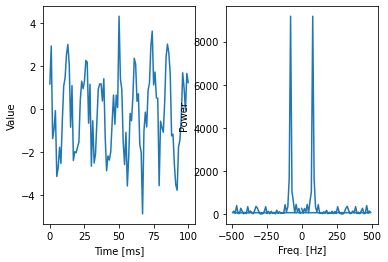

In [24]:
# Finding the Frequency of a Periodic Signal

t = numpy.arange(101)*0.001
freq_inserted = numpy.random.rand()*120 + 30
data = numpy.random.randn(*t.shape)
data += 2*numpy.cos(2*numpy.pi*freq_inserted*t)

freq = numpy.fft.fftfreq(data.size, d=0.001)
f_data = numpy.fft.fft(data)
print('Maximum Power:', freq[numpy.argmax(f_data)], 'Hz', 'vs.', freq_inserted, 'Hz')
print('Resolution:', freq[1]-freq[0], 'Hz')

pylab.subplot(1, 2, 1)
pylab.plot(t*1000, data)
pylab.xlabel('Time [ms]')
pylab.ylabel('Value')
pylab.subplot(1, 2, 2)
pylab.plot(freq, numpy.abs(f_data)**2)
pylab.xlabel('Freq. [Hz]')
pylab.ylabel('Power')
pylab.show()

Before Filtering: KurtosistestResult(statistic=-1.447853844071745, pvalue=0.14765793041095734)
After Filtering: KurtosistestResult(statistic=-0.21075294678249104, pvalue=0.8330800568162382)


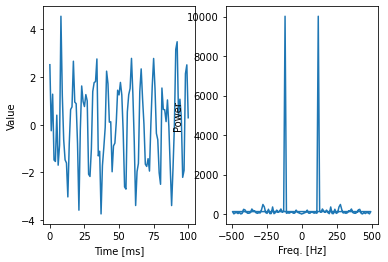

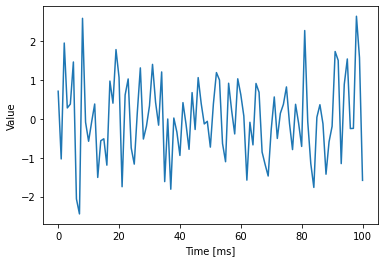

In [25]:
# Removing a Periodic Signal

from scipy.stats import kurtosistest

t = numpy.arange(101)*0.001
data = numpy.random.randn(*t.shape)
data += 2*numpy.cos(2*numpy.pi*120*t)
print('Before Filtering:', kurtosistest(data))

freq = numpy.fft.fftfreq(data.size, d=0.001)
f_data = numpy.fft.fft(data)

f_clean = f_data*1.0
f_clean[numpy.where(numpy.abs(freq-120) < 5)] = 0
f_clean[numpy.where(numpy.abs(freq+120) < 5)] = 0
clean = numpy.fft.ifft(f_clean).real
print('After Filtering:', kurtosistest(clean))

pylab.subplot(1, 2, 1)
pylab.plot(t*1000, data)
pylab.xlabel('Time [ms]')
pylab.ylabel('Value')
pylab.subplot(1, 2, 2)
pylab.plot(freq, numpy.abs(f_data)**2)
pylab.xlabel('Freq. [Hz]')
pylab.ylabel('Power')
pylab.figure()
pylab.plot(t*1000, clean)
pylab.xlabel('Time [ms]')
pylab.ylabel('Value')
pylab.show()

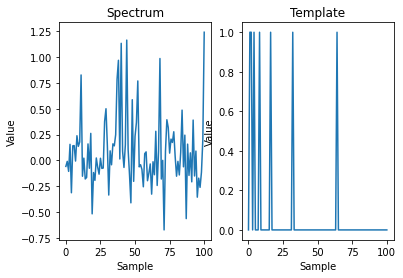

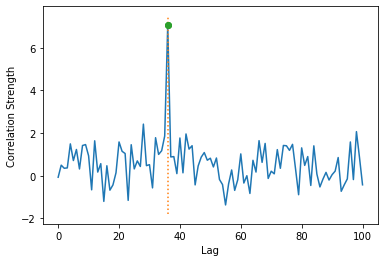

In [26]:
# Matched Filtering

reference = numpy.zeros(101)
for i in (1, 2, 4, 8, 16, 32, 64):
    reference[i] = 1.0
data = reference + numpy.random.randn(*reference.shape)*0.3
shift = int(numpy.random.rand()*data.size//2)
data = numpy.roll(data, shift)

corr = numpy.fft.ifft(numpy.fft.fft(data) * numpy.fft.fft(reference).conj()).real
peak = numpy.argmax(corr)

pylab.subplot(1, 2, 1)
pylab.plot(data)
pylab.xlabel('Sample')
pylab.ylabel('Value')
pylab.title('Spectrum')
pylab.subplot(1, 2, 2)
pylab.plot(reference)
pylab.xlabel('Sample')
pylab.ylabel('Value')
pylab.title('Template')
pylab.figure()
pylab.plot(corr)
pylab.plot([shift, shift], pylab.ylim(), linestyle=':')
pylab.plot([peak, peak], corr[[peak, peak]], linestyle='', marker='o')
pylab.xlabel('Lag')
pylab.ylabel('Correlation Strength')
pylab.show()

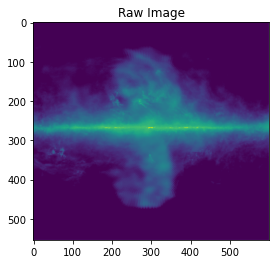

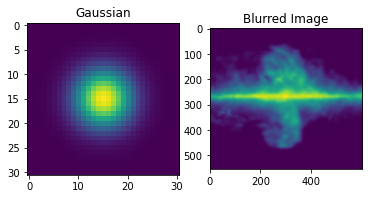

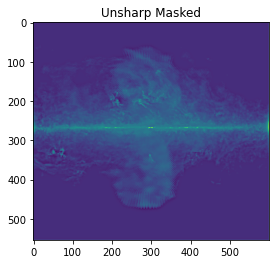

In [27]:
# Unsharp Masking

import os
from scipy.signal import fftconvolve
from matplotlib import image

if not os.path.exists("Bubbles_Artwork.jpg"):
    os.system("wget https://fermi.gsfc.nasa.gov/science/constellations/pages/inc/img/bubbles/Bubbles_Artwork.jpg")

fermi = image.imread("Bubbles_Artwork.jpg")
fermi = fermi.sum(axis=2)
gaussian = numpy.zeros((31,31))
for i in range(gaussian.shape[0]):
    for j in range(gaussian.shape[1]):
        gaussian[i,j] = numpy.exp(-(i-gaussian.shape[0]//2)**2/2/4.0**2 - (j-gaussian.shape[1]//2)**2/2/4.0**2)
gaussian /= gaussian.sum()
blurred_fermi = fftconvolve(fermi, gaussian, mode='same')
pylab.imshow(fermi)
pylab.title('Raw Image')
pylab.figure()
pylab.subplot(1, 2, 1)
pylab.imshow(gaussian)
pylab.title('Gaussian')
pylab.subplot(1, 2, 2)
pylab.imshow(blurred_fermi)
pylab.title('Blurred Image')
pylab.figure()
pylab.imshow(fermi-0.8*blurred_fermi)
pylab.title('Unsharp Masked')
pylab.show()

# Homework 10

Radar uses short radio frequency pulses to identify objects and their distances.  This is done by emitting a pulse and timing how long it takes for an echo to be recieved.  The distance to the object is then half of the transmit-receive delay divided by the speed of light.  You can do something similar with sound to estimate distances to objects.  I have recorded a short wav file of me trasmitting a series of three chrips in my house and have posted it at https://fornax.phys.unm.edu/lwa/data/for_c4p/ms.wav.  Load the sound file and correlate it to estimate the distance to the strongest echo for each chirp.
 
 * Hint #1 - You can load a wav file with the `scipy.io.wavfile` module.  This will also give you the sample rate in Hz to help convert samples to time.
 * Hint #2 - The wav file saves `numpy.int16` data.  You will want to convert to `numpy.float32` for analysis.